## Principles of Machine Learning Python Edition - Joshua Weaver
<h3 align="center"><b>DATA EXPLORATION</h3> 
    
### From Edx: 
 - Clean the data by replacing any missing values and removing duplicate rows. In this dataset, each customer is identified by a unique customer ID. The most recent version of a duplicated record should be retained.
 - Explore the data by calculating summary and descriptive statistics for the features in the dataset, calculating correlations between features, and creating data visualizations to determine apparent relationships in the data.
 - Based on your analysis of the customer data after removing all duplicate customer records, answer the questions below.

In [2]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import math
import os

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#set this to ensure floats are not represented in scientific notation 
pd.set_option('display.float_format', lambda x: '%.18f' % x)

#imports for analytical packages 
import statsmodels.formula.api as smf 
import statsmodels
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import sklearn.model_selection as model_selection
from sklearn import linear_model
import sklearn.metrics as metrics
import scipy.stats as stats

#imports for plots 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import matplotlib.style as style
#style.available get a list of avaialble styles, I'm selecting the five-thirty-eight style but you can choose whatever your heart desires :) 
style.use('fivethirtyeight')

In [28]:
import sklearn.model_selection as ms 
from sklearn.model_selection import cross_validate
from skkilearn.model_selection import cross_val_score

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [142]:
#double check my current working directory
os.getcwd()

'C:\\Users\\joweave\\OneDrive - Microsoft\\mpp_classes\\mpp_data_science_personal\\Principles-of-Machine-Learning-Python-master'

In [143]:
customers = pd.read_csv('C:\\Users\\joweave\\OneDrive - Microsoft\\mpp_classes\\mpp_data_science_personal\\Principles-of-Machine-Learning-Python-master\\\\Final Exam\\AdvWorksCusts.csv')
#print(customers.columns)
sales = pd.read_csv('C:\\Users\\joweave\\OneDrive - Microsoft\\mpp_classes\\mpp_data_science_personal\\Principles-of-Machine-Learning-Python-master\\\\Final Exam\\AW_AveMonthSpend.csv')
bike_flag = pd.read_csv('C:\\Users\\joweave\\OneDrive - Microsoft\\mpp_classes\\mpp_data_science_personal\\Principles-of-Machine-Learning-Python-master\\\\Final Exam\\AW_BikeBuyer.csv')

### list columns and get summary statistics for non-object columns, and look at the first few rows of code


In [144]:
#list columns
print(customers.columns)


Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')


In [145]:
#list first few rows of customers dataframe
#note that we used index_col='CustomerID' when reading the data in to set the CustoomerID
customers.head(10)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771
5,11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,...,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199
6,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,...,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756
7,11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,...,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759
8,11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,...,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005
9,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,...,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399


In [146]:
#generate summary stats for the customers table
print(customers.describe(exclude=['object'])) #customer ID is numeric value but we can ignore that for now

                    CustomerID            HomeOwnerFlag  \
count 16519.000000000000000000 16519.000000000000000000   
mean  20234.225195229733799351     0.673890671348144510   
std    5342.515987383601895999     0.468802025182641025   
min   11000.000000000000000000     0.000000000000000000   
25%   15604.500000000000000000     0.000000000000000000   
50%   20221.000000000000000000     1.000000000000000000   
75%   24860.500000000000000000     1.000000000000000000   
max   29482.000000000000000000     1.000000000000000000   

               NumberCarsOwned     NumberChildrenAtHome  \
count 16519.000000000000000000 16519.000000000000000000   
mean      1.500998849809310531     0.992009201525516082   
std       1.138962400812698172     1.515048324640639432   
min       0.000000000000000000     0.000000000000000000   
25%       1.000000000000000000     0.000000000000000000   
50%       2.000000000000000000     0.000000000000000000   
75%       2.000000000000000000     2.000000000000000000

#### Removing duplicate values and creating a single dataframe from the files

In [147]:
#edx says there are duplicate values but let's check these just to be certain 
customers.duplicated().value_counts() #yep there are duplicates 

'''Here I drop the duplicates based on Customer ID. In other cases, you might want to only drop if all rows are duplicated, for example if 
CustomerId were a Subscription ID, it's possible a subscription could occur multiple times, every week or month and so you would only want 
drop the duplicates that were an exact match.
'''
customers.drop_duplicates(subset='CustomerID', keep='first', inplace=True)

False    16421
True        98
dtype: int64

"Here I drop the duplicates based on Customer ID. In other cases, you might want to only drop if all rows are duplicated, for example if \nCustomerId were a Subscription ID, it's possible a subscription could occur multiple times, every week or month and so you would only want \ndrop the duplicates that were an exact match.\n"

In [148]:
# no duplicates should remain 
customers.duplicated().value_counts()

False    16404
dtype: int64

In [149]:
#lets check duplicates for the bike customers flag file
#first lets look at the dataframe 
bike_flag.head(4) #yep just two columns one of an ID and one of a 

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0


In [150]:
#we do see duplicates...
bike_flag.duplicated().value_counts()

False    16408
True       111
dtype: int64

In [151]:
#this drops duplicates only if all rows match, interestingly it's not the same number as below...
bike_flag_id = bike_flag.drop_duplicates()
bike_flag_id.duplicated().value_counts()

False    16408
dtype: int64

In [152]:
#here we see that when considering only the customerid column to identify duplicate rows we get 
#16404, assuming these is a snapshot in time we should be fine to use this method of removing duplicates 
bike_flag_id_alt = bike_flag.drop_duplicates(subset='CustomerID')
bike_flag_id_alt.duplicated().value_counts()

False    16404
dtype: int64

In [153]:
#let's make the drop duplicates change permanent for the bike_flag dataframe 
bike_flag.drop_duplicates(subset='CustomerID', keep='first', inplace=True)

In [154]:
#let's do a join to add in the bike_flag to the customers dataframe 
customers = pd.merge(customers, bike_flag, on ='CustomerID', indicator=True)

In [155]:
#let's check to see if the join worked as expected 
customers.CustomerID.count() #some number of rows so we didn't duplicate anything 
customers.columns #we see the BikeBuyer flag good
customers._merge.value_counts() #merge was a complete inner join, no  rows on either side of the join, yay! 

16404

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', '_merge'],
      dtype='object')

both          16404
right_only        0
left_only         0
Name: _merge, dtype: int64

In [156]:
#drop the _merge column, axis=1 indicates that i'm droppping a column
customers.drop(['_merge'], axis=1, inplace=True)
customers.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer'],
      dtype='object')

In [157]:
#EdX says "the most recent version of a duplicated record should be retained.". There doesn't seem to be a date column..
#so I intereprested that to mean use the keep='first' parameter
sales.drop_duplicates(subset='CustomerID', keep='first', inplace=True)

In [158]:
customer_sales = pd.merge(customers, sales, on='CustomerID', indicator=True )

In [159]:
customer_sales._merge.value_counts() #complete inner join

#drop the _merge column 
customer_sales.drop(['_merge'], axis=1, inplace=True)

both          16404
right_only        0
left_only         0
Name: _merge, dtype: int64

In [160]:
#let's look at the columns, we see the BikeBuyer flag and the AveMonthSpend
customer_sales.columns
customer_sales.head(5)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AveMonthSpend'],
      dtype='object')

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,0,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,1,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,0,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,0,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,1,95




### Identify and Remove Missing Values

In [161]:
customer_sales.isna().sum() 
'''Since most of these are NaNs I don't need to do much with them. 
They are also not in our avemonth spend column which is our numeric column so no need to fill these with zeros 
or replace with the mean'''

CustomerID                  0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16130
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
BikeBuyer                   0
AveMonthSpend               0
dtype: int64

"Since most of these are NaNs I don't need to do much with them. \nThey are also not in our avemonth spend column which is our numeric column so no need to fill these with zeros \nor replace with the mean"

In [162]:
customer_sales.AveMonthSpend.describe() #note that the median in this case is the 50% row, or the 50th percentile

count   16404.000000000000000000
mean       72.389904901243596669
std        27.269568136558827831
min        22.000000000000000000
25%        52.000000000000000000
50%        68.000000000000000000
75%        84.000000000000000000
max       176.000000000000000000
Name: AveMonthSpend, dtype: float64

In [163]:
customer_sales.BikeBuyer.describe()

count   16404.000000000000000000
mean        0.332297000731528902
std         0.471051197396163579
min         0.000000000000000000
25%         0.000000000000000000
50%         0.000000000000000000
75%         1.000000000000000000
max         1.000000000000000000
Name: BikeBuyer, dtype: float64

### Some data vizs's for the data exploration section

0    10953
1     5451
Name: BikeBuyer, dtype: int64

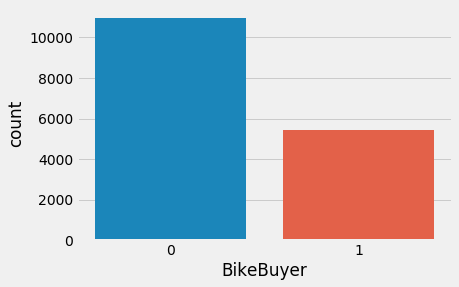

In [164]:
#Question 6: The distribution of the values in the BikeBuyer column indicates:
sns.countplot(x='BikeBuyer', data=customer_sales) #number of people who have versus who have not bought bikes 
customer_sales.BikeBuyer.value_counts() #same as above but without a viz

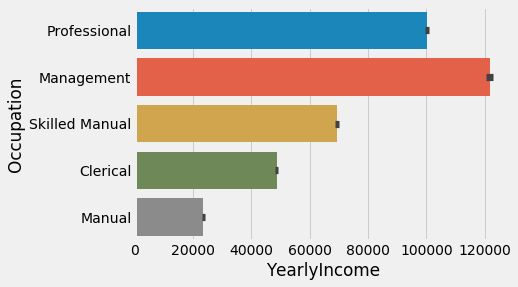

In [165]:
#question 7: Select the correct order (from lowest to highest) that ranks the median YearlyIncome by Occupation:
sns.barplot(x='YearlyIncome', y='Occupation', data=customer_sales)

#### Question 8: Based on their age at the time when the data was collected (1st January 1998),which group of customers accounts for the highest AveMonthSpend values?
This requires us to map ages to age groups

In [167]:
#import some datetime pacakges 
from datetime import datetime
#from datetime import timedelta
import time

In [168]:
#let's start by computing age 
customer_sales['BirthDate'] = pd.to_datetime(customer_sales.BirthDate)

In [169]:
customer_sales.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AveMonthSpend'],
      dtype='object')

In [170]:
#1st January 1998
cdate = '1998-01-01'
cdate = pd.to_datetime(cdate)
customer_sales['data_pull_date'] = cdate

In [171]:
customer_sales.data_pull_date.count()

16404

In [172]:
customer_sales.BirthDate.count()

16404

In [173]:
customer_sales.shape

(16404, 26)

In [174]:
#customer_sales['age'] = ((customer_sales['data_pull_date'] - customer_sales['BirthDate'])/np.timedelta64(1, 'Y'))
customer_sales['age'] = ((customer_sales['data_pull_date'] - customer_sales['BirthDate']))
customer_sales['age'] = (customer_sales['age']/np.timedelta64(1, 'Y'))

In [175]:
customer_sales['age'] = round(customer_sales.age, 0)
#customer_sales.age, to check it rounded to nearest whole number

In [176]:
#went hunting for the pandas or python equivalent of the SQL CASE WHEN statement which is really what I'd usually do to create a calculated column.
#I found this!: https://stackoverflow.com/questions/27041724/using-conditional-to-generate-new-column-in-pandas-dataframe

#customer_sales['age_group'] = np.where(customer_sales.age < 25, 'under 25'
#                                       ,(np.where((customer_sales.age >= 25) & (customer_sales.age <= 45)), '25-45')
#                                       ,(np.where((customer_sales.age > 45) & (customer_sales.age < 55)), '45-55')
#                                       ,(np.where((customer_sales.age > 55)), '55+')
#                                      )

#ok...that didn't work because it doesn't take more than 3 arguments...fail 
#this seems to be what I'm looking for...this is https://gist.github.com/heyrudder/f32a3173dbf0d59abbf53dbc05614a8d

In [177]:
customer_sales['age_group'] = ''

customer_sales.loc[(customer_sales.age < 25), 'age_group'] = 'under 25'
customer_sales.loc[(customer_sales.age >= 25) & (customer_sales.age <= 45), 'age_group'] = '25-45'
customer_sales.loc[(customer_sales.age > 45) & (customer_sales.age < 55), 'age_group'] = '45-55'
customer_sales.loc[(customer_sales.age >= 55), 'age_group'] = '55+'

In [178]:
customer_sales.age_group.value_counts()
#prior showed that I was missing 173 that were not categorized, after examining the above codee I realized I didn't categorize folks aged 55 it said > rather than >=
#as always it's about the fucking details. 

25-45       10371
under 25     2694
45-55        2193
55+          1146
Name: age_group, dtype: int64

In [179]:
customer_sales.drop(['data_pull_date'], axis=1, inplace=True)

In [180]:
customer_sales.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AveMonthSpend', 'age', 'age_group'],
      dtype='object')

### Let's write out this file, just in case our kernel dies. This will include both age and the age categories we calculated. 

In [181]:
customer_sales.to_csv('customer_sales_train.csv')

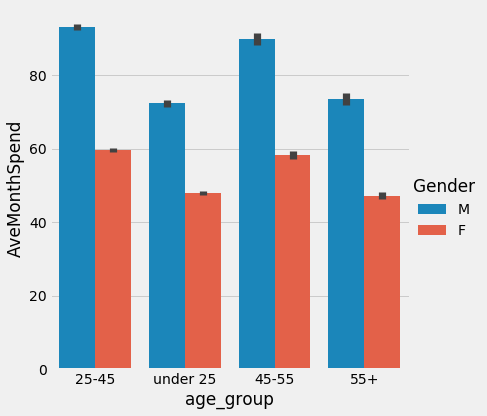

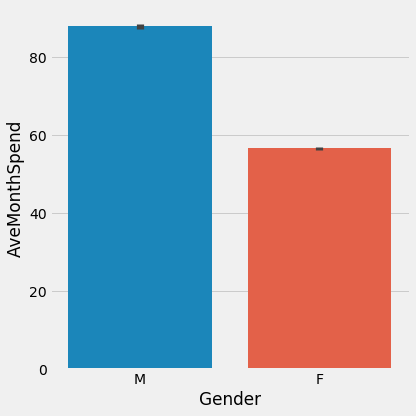

In [182]:
#seaborn is bloody awesome: https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="age_group", y="AveMonthSpend", hue="Gender", kind="bar", data=customer_sales, height=6);

sns.catplot(x="Gender", y="AveMonthSpend", kind="bar", data=customer_sales, height=6);

In [183]:
#bcause I was picky and wanted things to be pretty I searched for about 45 min to figure out how to transpose the results
#BEFORE TRANSPOSE
customer_sales.groupby(['MaritalStatus'], axis=0)['AveMonthSpend'].describe()

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
M,8852.000000000000000000,77.879801174875737502,29.165298422437441417,22.000000000000000000,54.000000000000000000,74.000000000000000000,90.000000000000000000,176.000000000000000000
S,7552.000000000000000000,65.954978813559321793,23.271831919273306966,25.000000000000000000,48.000000000000000000,62.000000000000000000,76.000000000000000000,159.000000000000000000


In [184]:
#AFTER TRANSPOSE, much better and intuitive 
customer_sales.groupby(['MaritalStatus'], axis=0)['AveMonthSpend'].describe().transpose()
customer_sales.groupby(['NumberCarsOwned'], axis=0)['AveMonthSpend'].describe().transpose()
customer_sales.groupby(['Gender'], axis=0)['AveMonthSpend'].describe().transpose()
customer_sales.groupby(['NumberChildrenAtHome'], axis=0)['AveMonthSpend'].describe().transpose()

MaritalStatus,M,S
count,8852.000000000000000000,7552.000000000000000000
mean,77.879801174875737502,65.954978813559321793
std,29.165298422437441417,23.271831919273306966
min,22.000000000000000000,25.000000000000000000
25%,54.000000000000000000,48.000000000000000000
50%,74.000000000000000000,62.000000000000000000
75%,90.000000000000000000,76.000000000000000000
max,176.000000000000000000,159.000000000000000000


NumberCarsOwned,0,1,2,3,4
count,3782.000000000000000000,4325.000000000000000000,5741.000000000000000000,1429.000000000000000000,1127.000000000000000000
mean,67.494447382337384056,66.287630057803468731,67.125936248040417809,97.933519944016794057,106.662821650399294526
std,19.913668361731016176,20.992599177201402227,23.549828365489460680,34.292904227965742336,33.493535764901977814
min,33.000000000000000000,26.000000000000000000,22.000000000000000000,31.000000000000000000,39.000000000000000000
25%,52.000000000000000000,50.000000000000000000,49.000000000000000000,74.000000000000000000,82.000000000000000000
50%,65.000000000000000000,63.000000000000000000,64.000000000000000000,92.000000000000000000,100.000000000000000000
75%,80.000000000000000000,78.000000000000000000,77.000000000000000000,124.000000000000000000,137.000000000000000000
max,161.000000000000000000,165.000000000000000000,175.000000000000000000,176.000000000000000000,175.000000000000000000


Gender,F,M
count,8114.000000000000000000,8290.000000000000000000
mean,56.619669706679815135,87.825331724969842639
std,16.412508347656878271,26.947675827750419586
min,22.000000000000000000,29.000000000000000000
25%,46.000000000000000000,70.000000000000000000
50%,52.000000000000000000,79.000000000000000000
75%,61.000000000000000000,96.000000000000000000
max,114.000000000000000000,176.000000000000000000


NumberChildrenAtHome,0,1,2,3,4,5
count,9924.000000000000000000,2180.000000000000000000,1455.000000000000000000,1057.000000000000000000,943.000000000000000000,845.000000000000000000
mean,59.792220878677952101,71.461467889908263373,83.474914089347080903,96.852412488174081773,113.232237539766700252,127.471005917159757814
std,14.566951144652483308,17.974508532916452452,21.130055687229816641,25.398658107526578931,27.753007908342112842,30.928570428871459796
min,22.000000000000000000,38.000000000000000000,45.000000000000000000,50.000000000000000000,59.000000000000000000,65.000000000000000000
25%,48.000000000000000000,56.000000000000000000,65.000000000000000000,76.000000000000000000,89.000000000000000000,99.000000000000000000
50%,57.000000000000000000,68.000000000000000000,79.000000000000000000,90.000000000000000000,101.000000000000000000,110.000000000000000000
75%,73.000000000000000000,88.000000000000000000,103.000000000000000000,122.000000000000000000,142.000000000000000000,158.000000000000000000
max,97.000000000000000000,114.000000000000000000,129.000000000000000000,143.000000000000000000,160.000000000000000000,176.000000000000000000


In [185]:
customer_sales.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AveMonthSpend', 'age', 'age_group'],
      dtype='object')

In [186]:
#The median YearlyIncome is higher for customers who bought a bike than for customers who didn't.--FALSE
customer_sales.groupby(['BikeBuyer'], axis=0)['YearlyIncome'].describe().transpose()

BikeBuyer,0,1
count,10953.000000000000000000,5451.000000000000000000
mean,70094.872089838405372575,94271.013942395889898762
std,36433.024461120025080163,41136.480520659461035393
min,9482.000000000000000000,10207.000000000000000000
25%,43133.000000000000000000,62039.500000000000000000
50%,65954.000000000000000000,96084.000000000000000000
75%,95892.000000000000000000,122695.500000000000000000
max,196511.000000000000000000,194314.000000000000000000


In [187]:
#The median number of cars owned by customers who bought a bike is lower than for customers who didn't.--FALSE
customer_sales.groupby(['BikeBuyer'], axis=0)['NumberCarsOwned'].describe().transpose()

BikeBuyer,0,1
count,10953.000000000000000000,5451.000000000000000000
mean,1.367296631059983669,1.765914511098880979
std,1.021382320985325887,1.304987392547769520
min,0.000000000000000000,0.000000000000000000
25%,1.000000000000000000,1.000000000000000000
50%,1.000000000000000000,2.000000000000000000
75%,2.000000000000000000,3.000000000000000000
max,4.000000000000000000,4.000000000000000000


In [188]:
#The most common occupation type for customers who bought a bike is skilled manual. FALSE
customer_sales.groupby(['BikeBuyer'])['Occupation'].value_counts().transpose()

BikeBuyer  Occupation    
0          Skilled Manual    2905
           Professional      2740
           Clerical          1981
           Management        1702
           Manual            1625
1          Professional      2182
           Skilled Manual    1133
           Management        1016
           Clerical           616
           Manual             504
Name: Occupation, dtype: int64

In [189]:
#Male customers are more likely to buy bikes than female customers. TRUE
customer_sales.groupby(['BikeBuyer'])['Gender'].value_counts().transpose()

BikeBuyer  Gender
0          F         5882
           M         5071
1          M         3219
           F         2232
Name: Gender, dtype: int64

In [190]:
#A maried customer is more likely to buy a bike. FALSE
customer_sales.groupby(['MaritalStatus'])['BikeBuyer'].value_counts().transpose()

MaritalStatus  BikeBuyer
M              0            6656
               1            2196
S              0            4297
               1            3255
Name: BikeBuyer, dtype: int64

<h3 align="center"><b>Classification</h3> 

#### This is a binary classification problem. We are only predicting 1 of two options, purchase a bike or not purchase a bike. 

### From Edx: 
1. Use the Adventure Works Cycles customer data you worked with in challenge 1 to create a classification model that predicts whether or not a customer will purchase a bike. The model should predict bike purchasing for new customers for whom no information about average monthly spend or previous bike purchases is available.
2. Download the **test data**. This data includes customer features but does not include bike purchasing or average monthly spend values.
3. Use your model to predict the corresponding test dataset. Don't forget to apply what you've learned throughout this course.
4. Go to the next page to check how well your prediction against the actual result.

### NOTE!!! The average monthly spend is NOT present in the test data, so we cannot use that as a predictor in our model. 

### Data Prep

In [4]:
from sklearn import preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics

In [192]:
#let's set the index to the be CustomerID. I think we will likely need this when we generate predictions plus may come in handy later
customer_sales.set_index('CustomerID') #note i cleared the outpout of this cell since the set_index function prints most of the dataframe

,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend,age,age_group
CustomerID,,,,,,,,,,,,,,,,,,,,,
11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,...,M,1,0,0,2,137947,0,89,32.000000000000000000,25-45
11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,...,S,0,1,3,3,101141,1,117,33.000000000000000000,25-45
11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,...,M,1,1,3,3,91945,0,123,32.000000000000000000,25-45
11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,...,S,0,1,0,0,86688,0,50,30.000000000000000000,25-45
11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,...,S,1,4,5,5,92771,1,95,29.000000000000000000,25-45
11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,Australia,...,S,1,1,0,0,103199,1,78,32.000000000000000000,25-45
11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,Australia,...,S,1,1,0,0,84756,1,54,32.000000000000000000,25-45
11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,Australia,...,M,1,2,3,3,109759,1,130,34.000000000000000000,25-45
11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,Australia,...,S,1,3,4,4,88005,1,85,33.000000000000000000,25-45


In [193]:
#since I can never remember the exact naming of these columns lets look at the columns in our dataframe 
customer_sales.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AveMonthSpend', 'age', 'age_group'],
      dtype='object')

Ok this doesn't give us much to work with in terms of numerical data types. 
So let's think about doing dummy coding. see this: https://stats.stackexchange.com/questions/224051/one-hot-vs-dummy-encoding-in-scikit-learn

Dummy coding in Pandas does k-1, OPTIONALLY otherwise it makes it identical to the one-hot encoding and perfectly represents the variable 
with some redunandcy in a regression context.

I don't really want to get into the weeds with which is better because...speed is everything. So I'm just going to use the get_dummies because it's familiar and yeah. Fight me....

In [194]:
for c in customer_sales:
    columns = c
    unique_counts = customer_sales[""+c+""].nunique()
    print('Number of ' + columns + ' values: ' + str(unique_counts))

Number of CustomerID values: 16404
Number of Title values: 5
Number of FirstName values: 662
Number of MiddleName values: 44
Number of LastName values: 363
Number of Suffix values: 1
Number of AddressLine1 values: 11871
Number of AddressLine2 values: 154
Number of City values: 269
Number of StateProvinceName values: 52
Number of CountryRegionName values: 6
Number of PostalCode values: 323
Number of PhoneNumber values: 7949
Number of BirthDate values: 7896
Number of Education values: 5
Number of Occupation values: 5
Number of Gender values: 2
Number of MaritalStatus values: 2
Number of HomeOwnerFlag values: 2
Number of NumberCarsOwned values: 5
Number of NumberChildrenAtHome values: 6
Number of TotalChildren values: 6
Number of YearlyIncome values: 15465
Number of BikeBuyer values: 2
Number of AveMonthSpend values: 152
Number of age values: 70
Number of age_group values: 4


I'm not entirely sure if neural networks have an issue of a k/n ratio (k being number of features and n being number of observations or customers in this case). Definitely happens in regression. Probably overfits.....but let's find out. 

In [195]:
customer_sales.CountryRegionName.value_counts()
customer_sales.StateProvinceName.value_counts()

United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

California             3948
Washington             2017
England                1709
British Columbia       1388
New South Wales        1376
Oregon                  934
Victoria                801
Queensland              713
Saarland                388
Nordrhein-Westfalen     362
Seine (Paris)           341
Hessen                  334
Hamburg                 268
Seine Saint Denis       255
Nord                    247
South Australia         212
Bayern                  198
Hauts de Seine          168
Yveline                 149
Essonne                 131
Tasmania                 92
Seine et Marne           52
Loiret                   52
Moselle                  49
Brandenburg              27
Val d'Oise               27
Val de Marne             26
Garonne (Haute)          25
Somme                    20
Charente-Maritime        19
Loir et Cher             15
Pas de Calais            15
Alberta                  10
Illinois                  6
Ohio                      4
Texas               

Ok...so the variable State--doesn't make sense to make it into a specific variable...and thinking of a decision forest/tree I'm not sure that is going to add a bunch of information to the model and it increases my features to 51 (using dummy coding) and I think probably under 50 features is best given the sample size...

So let's dummy code for 
- Education
- Occupation 
- Gender (probably not an ethical issue here unless we are only targeting mountain bikes to men" could be spun as sexist). But given the prior frequencies we saw that men tended to buy more than women so it makes sense to not market or target interventions at low-propensity buyers. This one we will recode values 0 for men and 1 for women). 
- CountryRegionName
- MaritalStatus (actually we will just map this to 0 and 1 values, 0 for single and 1 for married)


No dummy coding for 
- age since it's already a numeric type and decreases the variance in the variable by collappsing into groups
- HomeOwnerFlag
- NumberCarsOwned
- NumberChildrenAtHome
- TotalChildren
- YearlyIncome

In [196]:
customer_sales.MaritalStatus.value_counts()
customer_sales.Gender.value_counts()
customer_sales.CountryRegionName.value_counts()

M    8852
S    7552
Name: MaritalStatus, dtype: int64

M    8290
F    8114
Name: Gender, dtype: int64

United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

In [197]:
#recode variables, a few different methods suggested here: https://chrisalbon.com/
# and here: https://pbpython.com/categorical-encoding.html
# the mehot I'm using uses map in Pandas
customer_sales['gender_recoded'] = customer_sales.Gender.map({'M':1, 'F':0})

customer_sales['maritalstatus_recoded'] = customer_sales.MaritalStatus.map({'M':1, 'S':0})

In [336]:
#dummy coding! https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

customer_sales_dummies = pd.get_dummies(customer_sales, columns=[ 'Education', 'Occupation', 'CountryRegionName'], prefix=['education', 'occupation', 'country'], drop_first=True)

In [337]:
#check that get dummies worked correctly, look at columns and rows
customer_sales_dummies.columns
customer_sales_dummies.CustomerID.count()

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'PostalCode', 'PhoneNumber', 'BirthDate', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'BikeBuyer', 'AveMonthSpend', 'age',
       'age_group', 'gender_recoded', 'maritalstatus_recoded',
       'education_Graduate Degree', 'education_High School',
       'education_Partial College', 'education_Partial High School',
       'occupation_Management', 'occupation_Manual', 'occupation_Professional',
       'occupation_Skilled Manual', 'country_Canada', 'country_France',
       'country_Germany', 'country_United Kingdom', 'country_United States'],
      dtype='object')

16404

In [338]:
#write out dataframe for use later 
os.getcwd()
customer_sales_dummies.to_csv('customer_sales_train_dummies.csv')

'C:\\Users\\joweave\\OneDrive - Microsoft\\mpp_classes\\mpp_data_science_personal\\Principles-of-Machine-Learning-Python-master'

In [339]:
customer_sales_dummies.BikeBuyer.value_counts()

0    10953
1     5451
Name: BikeBuyer, dtype: int64

In [378]:
features = np.array(customer_sales_dummies[[
        'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome','TotalChildren'
       ,'YearlyIncome', 'age', 'gender_recoded', 'maritalstatus_recoded'
       ,'education_Graduate Degree', 'education_High School', 'education_Partial College', 'education_Partial High School'
       ,'occupation_Management', 'occupation_Manual', 'occupation_Professional','occupation_Skilled Manual'
       ,'country_Canada','country_France', 'country_Germany', 'country_United Kingdom'
       ,'country_United States']])
#reference categories 'education_Bachelors ', 'country_Australia', 'occupation_Clerical'


outcome = np.array(customer_sales_dummies['BikeBuyer'])

In [379]:
scale = preprocessing.StandardScaler()
scale.fit(features)
features = scale.transform(features)
features

StandardScaler(copy=True, with_mean=True, with_std=True)

array([[ 0.69530633, -1.31661475, -0.6545231 , ..., -0.32612884,
        -0.34102501, -0.85579782],
       [-1.43821501, -0.43872887,  1.32667944, ..., -0.32612884,
        -0.34102501, -0.85579782],
       [ 0.69530633, -0.43872887,  1.32667944, ..., -0.32612884,
        -0.34102501, -0.85579782],
       ...,
       [ 0.69530633, -1.31661475, -0.6545231 , ..., -0.32612884,
         2.93233621, -0.85579782],
       [-1.43821501, -1.31661475, -0.6545231 , ...,  3.06627285,
        -0.34102501, -0.85579782],
       [ 0.69530633, -1.31661475, -0.6545231 , ..., -0.32612884,
        -0.34102501, -0.85579782]])

## CLASSIFICATION - Random Forest Classifier (bagging)

In [5]:
#imports for analysis, we imported them previously but re-importing and carrying down for easier access
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import numpy.random as nr

#suppress future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

#### Use nested cross-validation with 10-fold cross-validation. The inner cross-validation is used to identify the best parameters while the outer cross-validation is used to fit the model. 

In [381]:
#this defines the inner cross-validation
nr.seed(123)
inside = model_selection.KFold(n_splits=10, shuffle = True)

#this defines outer cross-validation
nr.seed(321)
outside = model_selection.KFold(n_splits=10, shuffle = True)

The code in the cell below estimates the best hyperparameters using 10 fold cross validation. There are a few points to note here:
1. In this case, a grid of two hyperparameters is searched: 
  - max_features determines the maximum number of features used to determine the splits. Minimizing the number of features can prevent model over-fitted by induces bias. 
  - min_samples_leaf determines the minimum number of samples or leaves which must be on each terminal node of the tree. Maintaining the minimum number of samples per terminal node is a regularization method. Having too few samples on terminal leaves allows the model training to memorize the data, leading to high variance. Forcing too many samples on the terminal nodes leads to biased predictions. 
2. Since there is a class imbalance between customers who bought a bike and those who did not and  a difference in the cost to the company of misclassification of a customer who will buy a bike, the "balanced" argument is used. The balanced argument ensures that the subsamples used to train each tree have balanced cases. 
3. The model is fit on each set of hyperparameters from the grid. 
4. The best estimated hyperparameters are printed. 

The model uses regularization rather than feature selection. The hyperparameter search is intended to optimize the level of regularization. 

In [383]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_features": [2, 3, 5, 10, 15, 20, 21], "min_samples_leaf":[3, 5, 10, 20, 22]}

#Define scoring metrics 

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}

## Define the random forest model
nr.seed(3456)
rf_clf = RandomForestClassifier(class_weight = "balanced") # class_weight = {0:0.33, 1:0.67}) 

## Perform the grid search over the parameters
nr.seed(4455)
rf_clf = model_selection.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'accuracy',
                      return_train_score = True)
rf_clf.fit(features, outcome)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [2, 3, 5, 10, 15, 20, 21], 'min_samples_leaf': [3, 5, 10, 20, 22]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

5
20


In [384]:
nr.seed(498)
cv_estimate = model_selection.cross_val_score(rf_clf, features, outcome, 
                                 cv = outside) # Use the outside folds

print('Mean accuracy = %4.3f' % np.mean(cv_estimate))
print('SDT of accuracy       = %4.3f' % np.std(cv_estimate))
print('Accuracy by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean accuracy = 0.773
SDT of accuracy       = 0.010
Accuracy by cv fold
Fold  1    0.785
Fold  2    0.772
Fold  3    0.785
Fold  4    0.764
Fold  5    0.772
Fold  6    0.764
Fold  7    0.767
Fold  8    0.758
Fold  9    0.788
Fold 10    0.774


In [416]:
results1 = pd.DataFrame(data=rf_clf.cv_results_)
results1.columns
results1.mean_train_score.mean()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_features', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

0.8270044406332941

In [386]:
#create final cross validation fold for best parameters
#this defines outer cross-validation
nr.seed(45678)
final = model_selection.KFold(n_splits=10, shuffle = True)

In [387]:
nr.seed(1115)
rf_clf_best_params = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_clf_best_params.fit(features, outcome)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [388]:
#fyi use cross_validate if you want to use multiple evaluation metrics: https://stackoverflow.com/questions/23339523/sklearn-cross-validation-with-multiple-scores
nr.seed(777)
cv_estimate2 = model_selection.cross_val_score(rf_clf_best_params, features, outcome, 
                                 cv = final) # Use the outside folds

print('Mean accuracy = %4.3f' % np.mean(cv_estimate2))
print('SDT of accuracy       = %4.3f' % np.std(cv_estimate2))
print('Accuracy by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean accuracy = 0.772
SDT of accuracy       = 0.013
Accuracy by cv fold
Fold  1    0.785
Fold  2    0.772
Fold  3    0.785
Fold  4    0.764
Fold  5    0.772
Fold  6    0.764
Fold  7    0.767
Fold  8    0.758
Fold  9    0.788
Fold 10    0.774


### Predicting new data with Random Forest Classifier. 
I was going to look into using pipelines...I'm lazy and wanted to do this quickly. I think this works....

In [389]:
#read in test data 
test = pd.read_csv('C:\\Users\\joweave\\OneDrive - Microsoft\\mpp_classes\\mpp_data_science_personal\\Principles-of-Machine-Learning-Python-master\\\\Final Exam\\AW_test_classification.csv', 
                  )


In [390]:
test.CustomerID.count()

500

In [391]:
test.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')

In [392]:
#1st January 1998
cdate = '1998-01-01'
cdate = pd.to_datetime(cdate)
test['data_pull_date'] = cdate

In [393]:
#customer_sales['age'] = ((customer_sales['data_pull_date'] - customer_sales['BirthDate'])/np.timedelta64(1, 'Y'))
test['age'] = ((test['data_pull_date'] - pd.to_datetime(test['BirthDate'])))
test['age'] = (test['age']/np.timedelta64(1, 'Y'))

In [394]:
test['age'] = round(test.age, 0)
#customer_sales.age, to check it rounded to nearest whole number

In [395]:
#recode variables
test['gender_recoded'] = test.Gender.map({'M':1, 'F':0})
test['maritalstatus_recoded'] = test.MaritalStatus.map({'M':1, 'S':0})

#dummy variables
test_dummies = pd.get_dummies(test, columns=[ 'Education', 'Occupation', 'CountryRegionName'], prefix=['education', 'occupation', 'country'], drop_first=True)

In [396]:
test_features = np.array(test_dummies[[ 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'age', 'gender_recoded', 'maritalstatus_recoded'
       ,'education_Graduate Degree', 'education_High School', 'education_Partial College', 'education_Partial High School'
       ,'occupation_Management', 'occupation_Manual', 'occupation_Professional'
       ,'occupation_Skilled Manual', 'country_Canada','country_France', 'country_Germany'
       ,'country_United Kingdom','country_United States']])
#reference categories 'education_Bachelors ', 'country_Australia', 'occupation_Clerical'

In [397]:
#scale = preprocessing.StandardScaler()
#scale.fit(features)
test_features = scale.transform(test_features)

In [398]:
test_predictions = rf_clf_best_params.predict(test_features)
print(test_predictions)

[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 0 1 1 1 1 

In [399]:
test_predictionsdf = pd.DataFrame(data=test_predictions)

In [400]:
test_predictionsdf.count()

0    500
dtype: int64

In [ ]:
test_predictionsdf.reset_index()
#test_predictionsdf.head(5)

In [409]:
cid = pd.DataFrame(data=test['CustomerID'])
cid.reset_index()

,index,CustomerID
0,0,18988
1,1,29135
2,2,12156
3,3,13749
4,4,27780
5,5,16375
6,6,16109
7,7,15606
8,8,20888
9,9,20716


In [410]:
predictions_with_cid = pd.merge(cid, test_predictionsdf, left_index=True, right_index=True)

In [411]:
predictions_with_cid

,CustomerID,0
0,18988,0
1,29135,1
2,12156,0
3,13749,0
4,27780,0
5,16375,0
6,16109,1
7,15606,1
8,20888,1
9,20716,0


In [412]:
predictions_with_cid.to_csv('predictions_with_cid.csv')

In [25]:
os.getcwd()

'C:\\Users\\joweave\\OneDrive - Microsoft\\mpp_classes\\mpp_data_science_personal\\Principles-of-Machine-Learning-Python-master'

## Regression - Neural Network Regression

In [8]:
customer_sales_prepped = pd.read_csv('C:\\Users\\joweave\\OneDrive - Microsoft\\mpp_classes\\mpp_data_science_personal\\Principles-of-Machine-Learning-Python-master\\\\customer_sales_train_dummies.csv'
                                    ,low_memory=False)

In [10]:
#import neural network regressor
from sklearn.neural_network import MLPRegressor
import numpy.random as nr

In [12]:
features = np.array(customer_sales_prepped[[
        'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome','TotalChildren'
       ,'YearlyIncome', 'age', 'gender_recoded', 'maritalstatus_recoded'
       ,'education_Graduate Degree', 'education_High School', 'education_Partial College', 'education_Partial High School'
       ,'occupation_Management', 'occupation_Manual', 'occupation_Professional','occupation_Skilled Manual'
       ,'country_Canada','country_France', 'country_Germany', 'country_United Kingdom'
       ,'country_United States']])
#reference categories 'education_Bachelors ', 'country_Australia', 'occupation_Clerical'


outcome = np.array(customer_sales_prepped['AveMonthSpend'])

In [13]:
scale = preprocessing.StandardScaler()
scale.fit(features)
features = scale.transform(features)
features

StandardScaler(copy=True, with_mean=True, with_std=True)

array([[ 0.69530633, -1.31661475, -0.6545231 , ..., -0.32612884,
        -0.34102501, -0.85579782],
       [-1.43821501, -0.43872887,  1.32667944, ..., -0.32612884,
        -0.34102501, -0.85579782],
       [ 0.69530633, -0.43872887,  1.32667944, ..., -0.32612884,
        -0.34102501, -0.85579782],
       ...,
       [ 0.69530633, -1.31661475, -0.6545231 , ..., -0.32612884,
         2.93233621, -0.85579782],
       [-1.43821501, -1.31661475, -0.6545231 , ...,  3.06627285,
        -0.34102501, -0.85579782],
       [ 0.69530633, -1.31661475, -0.6545231 , ..., -0.32612884,
        -0.34102501, -0.85579782]])

In [420]:
# temp_Labels = outcome[outcome == 1] 
# temp_Features = features[outcome == 1,:]
# temp_Features = np.concatenate((features, temp_Features), axis = 0)
# temp_Labels = np.concatenate((outcome, temp_Labels), axis = 0) 

# print(temp_Features.shape)
# print(temp_Labels.shape)

(21855, 21)
(21855,)


In [11]:
#this defines the inner cross-validation
nr.seed(111)
insidereg = model_selection.KFold(n_splits=10, shuffle = True)

#this defines outer cross-validation
nr.seed(222)
outsidereg = model_selection.KFold(n_splits=10, shuffle = True)

In [12]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha":[0.0000001,0.000001,0.00001], 
              "early_stopping":[True, False], 
              "beta_1":[0.95,0.90,0.80], 
              "beta_2":[0.999,0.9,0.8]}

## Define the Neural Network model
nn_clf = MLPRegressor(hidden_layer_sizes = (100,100, 100)
                      ,max_iter=900
                     ,verbose=True)

## Perform the grid search over the parameters
nr.seed(3333)
nn_clf = model_selection.GridSearchCV(estimator = nn_clf, param_grid = param_grid
                      ,cv = insidereg # Use the inside folds
                      ,scoring = 'neg_mean_squared_error' #https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
                      ,return_train_score = True
                      ,n_jobs=-1)

nr.seed(6677)
nn_clf.fit(features, outcome)
print(nn_clf.best_estimator_.alpha)
print(nn_clf.best_estimator_.early_stopping)
print(nn_clf.best_estimator_.beta_1)
print(nn_clf.best_estimator_.beta_2)

Iteration 1, loss = 1362.97598391
Validation score: 0.751274
Iteration 2, loss = 35.93910140
Validation score: 0.942943
Iteration 3, loss = 14.09150909
Validation score: 0.965826
Iteration 4, loss = 10.15914005
Validation score: 0.972569
Iteration 5, loss = 8.79682309
Validation score: 0.975055
Iteration 6, loss = 7.95152607
Validation score: 0.977175
Iteration 7, loss = 7.44433137
Validation score: 0.978476
Iteration 8, loss = 6.97034724
Validation score: 0.979225
Iteration 9, loss = 6.57773976
Validation score: 0.980331
Iteration 10, loss = 6.28717349
Validation score: 0.981249
Iteration 11, loss = 6.08337124
Validation score: 0.981740
Iteration 12, loss = 5.85923702
Validation score: 0.981691
Iteration 13, loss = 5.70350786
Validation score: 0.982299
Iteration 14, loss = 5.58032049
Validation score: 0.982963
Iteration 15, loss = 5.60047936
Validation score: 0.983145
Iteration 16, loss = 5.47122406
Validation score: 0.983089
Iteration 17, loss = 5.37407838
Validation score: 0.983684


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=900, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [1e-07, 1e-06, 1e-05], 'early_stopping': [True, False], 'beta_1': [0.95, 0.9, 0.8], 'beta_2': [0.999, 0.9, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

1e-06
True
0.8
0.9


In [16]:
nr.seed(498)
cv_estimate_nn = model_selection.cross_val_score(nn_clf, features, outcome, 
                                 cv = outsidereg) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate_nn))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate_nn))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate_nn):
    print('Fold %2d    %4.3f' % (i+1, x))

Iteration 1, loss = 1492.44003751
Iteration 2, loss = 41.39148202
Iteration 3, loss = 21.67325919
Iteration 4, loss = 15.91427940
Iteration 5, loss = 12.83757284
Iteration 6, loss = 11.11630941
Iteration 7, loss = 10.05699981
Iteration 8, loss = 9.30965792
Iteration 9, loss = 8.76397981
Iteration 10, loss = 8.32538592
Iteration 11, loss = 8.01415378
Iteration 12, loss = 7.72151461
Iteration 13, loss = 7.49512131
Iteration 14, loss = 7.31209318
Iteration 15, loss = 7.13063829
Iteration 16, loss = 6.96532759
Iteration 17, loss = 6.85269641
Iteration 18, loss = 6.78799437
Iteration 19, loss = 6.66181846
Iteration 20, loss = 6.52001193
Iteration 21, loss = 6.42192294
Iteration 22, loss = 6.34938701
Iteration 23, loss = 6.26251210
Iteration 24, loss = 6.18895387
Iteration 25, loss = 6.08957501
Iteration 26, loss = 6.07072675
Iteration 27, loss = 5.95232881
Iteration 28, loss = 5.83890825
Iteration 29, loss = 5.78463847
Iteration 30, loss = 5.66771229
Iteration 31, loss = 5.57643687
Iteratio

C:\Users\joweave\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 1, loss = 1423.71502013
Iteration 2, loss = 68.54185435
Iteration 3, loss = 23.25474376
Iteration 4, loss = 17.30118453
Iteration 5, loss = 14.40506781
Iteration 6, loss = 12.64504308
Iteration 7, loss = 11.40240146
Iteration 8, loss = 10.46685481
Iteration 9, loss = 9.81793551
Iteration 10, loss = 9.26058536
Iteration 11, loss = 8.81804331
Iteration 12, loss = 8.44352987
Iteration 13, loss = 8.15313787
Iteration 14, loss = 7.94379954
Iteration 15, loss = 7.70875431
Iteration 16, loss = 7.54301916
Iteration 17, loss = 7.34348300
Iteration 18, loss = 7.20241602
Iteration 19, loss = 7.07074958
Iteration 20, loss = 6.97322507
Iteration 21, loss = 6.92210797
Iteration 22, loss = 6.78731078
Iteration 23, loss = 6.80408251
Iteration 24, loss = 6.64831401
Iteration 25, loss = 6.58481119
Iteration 26, loss = 6.49745010
Iteration 27, loss = 6.46400700
Iteration 28, loss = 6.37832512
Iteration 29, loss = 6.32602348
Iteration 30, loss = 6.25571888
Iteration 31, loss = 6.24853796
Iterati

C:\Users\joweave\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 1, loss = 1477.85634860
Iteration 2, loss = 62.96878035
Iteration 3, loss = 23.52615945
Iteration 4, loss = 17.71866648
Iteration 5, loss = 14.90901226
Iteration 6, loss = 13.06126622
Iteration 7, loss = 11.75965141
Iteration 8, loss = 10.76638545
Iteration 9, loss = 10.00487299
Iteration 10, loss = 9.38507835
Iteration 11, loss = 8.96391723
Iteration 12, loss = 8.52656726
Iteration 13, loss = 8.22361900
Iteration 14, loss = 7.92558068
Iteration 15, loss = 7.70313767
Iteration 16, loss = 7.49142685
Iteration 17, loss = 7.32213007
Iteration 18, loss = 7.14106578
Iteration 19, loss = 6.98400984
Iteration 20, loss = 6.80180874
Iteration 21, loss = 6.62926227
Iteration 22, loss = 6.43879567
Iteration 23, loss = 6.19141107
Iteration 24, loss = 6.11539040
Iteration 25, loss = 5.88567400
Iteration 26, loss = 5.82128335
Iteration 27, loss = 5.66178337
Iteration 28, loss = 5.55913457
Iteration 29, loss = 5.49763316
Iteration 30, loss = 5.44823799
Iteration 31, loss = 5.36206583
Iterat

In [17]:
#this defines final cross-validation used once the best parameters have been identified
nr.seed(777)
finalreg = model_selection.KFold(n_splits=10, shuffle = True)

In [19]:
nr.seed(1115)
nn_best = MLPRegressor(hidden_layer_sizes = (100,100, 100), 
                       #alpha = nn_clf.best_estimator_.alpha, 
                       #early_stopping = nn_clf.best_estimator_.early_stopping, 
                       beta_1 = nn_clf.best_estimator_.beta_1, 
                       beta_2 = nn_clf.best_estimator_.beta_2,
                       max_iter = 900)
nr.seed(9999)
nn_best.fit(features, outcome)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.8,
       beta_2=0.9, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=900, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
#use nn_best for predicting AveMonthSpend
nr.seed(498)
cv_estimate_nn_best = model_selection.cross_val_score(nn_best, features, outcome, 
                                 cv = finalreg) # Use the final folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate_nn_best))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate_nn_best))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate_nn_best):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.985
SDT of the metric       = 0.001
Outcomes by cv fold
Fold  1    0.985
Fold  2    0.986
Fold  3    0.985
Fold  4    0.983
Fold  5    0.985
Fold  6    0.984
Fold  7    0.986
Fold  8    0.985
Fold  9    0.987
Fold 10    0.985


## Test Predictions with Neural Network Regression

In [31]:
#read in test data 
test = pd.read_csv('C:\\Users\\joweave\\OneDrive - Microsoft\\mpp_classes\\mpp_data_science_personal\\Principles-of-Machine-Learning-Python-master\\\\Final Exam\\AW_test_classification.csv', 
                  )

In [32]:
test.CustomerID.count()

500

In [33]:
test.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')

In [34]:
#1st January 1998
cdate = '1998-01-01'
cdate = pd.to_datetime(cdate)
test['data_pull_date'] = cdate

In [35]:
#customer_sales['age'] = ((customer_sales['data_pull_date'] - customer_sales['BirthDate'])/np.timedelta64(1, 'Y'))
test['age'] = ((test['data_pull_date'] - pd.to_datetime(test['BirthDate'])))
test['age'] = (test['age']/np.timedelta64(1, 'Y'))

In [36]:
test['age'] = round(test.age, 0)
#customer_sales.age, to check it rounded to nearest whole number

In [37]:
#recode variables
test['gender_recoded'] = test.Gender.map({'M':1, 'F':0})
test['maritalstatus_recoded'] = test.MaritalStatus.map({'M':1, 'S':0})

#dummy variables
test_dummies = pd.get_dummies(test, columns=[ 'Education', 'Occupation', 'CountryRegionName'], prefix=['education', 'occupation', 'country'], drop_first=True)

In [38]:
test_features = np.array(test_dummies[[ 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'age', 'gender_recoded', 'maritalstatus_recoded'
       ,'education_Graduate Degree', 'education_High School', 'education_Partial College', 'education_Partial High School'
       ,'occupation_Management', 'occupation_Manual', 'occupation_Professional'
       ,'occupation_Skilled Manual', 'country_Canada','country_France', 'country_Germany'
       ,'country_United Kingdom','country_United States']])
#reference categories 'education_Bachelors ', 'country_Australia', 'occupation_Clerical'

In [39]:
#scale = preprocessing.StandardScaler()
#scale.fit(features)
test_features = scale.transform(test_features)

In [40]:
test_features

array([[-1.43821501,  0.43915701, -0.6545231 , ..., -0.32612884,
        -0.34102501,  1.16850029],
       [ 0.69530633,  0.43915701,  0.66627859, ..., -0.32612884,
        -0.34102501, -0.85579782],
       [ 0.69530633,  0.43915701, -0.6545231 , ..., -0.32612884,
        -0.34102501,  1.16850029],
       ...,
       [-1.43821501,  2.19492876,  1.32667944, ..., -0.32612884,
        -0.34102501,  1.16850029],
       [ 0.69530633, -0.43872887, -0.6545231 , ..., -0.32612884,
        -0.34102501,  1.16850029],
       [-1.43821501,  0.43915701, -0.6545231 , ..., -0.32612884,
        -0.34102501, -0.85579782]])

In [45]:
test_predictions_nn = nn_best.predict(test_features)
print(test_predictions_nn)

[ 46.84923365 110.77479472  45.01576458  86.19609787  57.57842894
  47.08739127  96.84842814 139.37460813  95.65864713  54.20500365
  59.04780704  50.42630661  71.4292895   47.81808963  41.05157114
  53.58664219  84.08670725  71.33270671  97.67161754  58.31818129
  65.58167961  73.8178284  162.14897519  83.26779903  52.3967417
  67.42533177  86.25466536 120.58624206  74.36939603  57.8568565
  66.00141696  78.07408877  43.78554273  68.96605955  94.97286965
 100.61392585 163.56291775  93.91730835  52.57599467  86.99388311
  49.00987035  75.57413481  77.18215964  51.38799688  55.72035699
  72.61928969  57.87674266  79.81836113 119.80664088  79.28278689
  72.73054912  87.00124904  76.78806495  63.58637096  49.238358
  75.5469201   56.44230196  72.81589996  58.8338811   64.35040851
  48.31951013  61.03668008  89.317038    77.56664582  48.96049471
  75.75588299  74.99017409 149.12764198  60.8197524   96.18658519
  79.60105781  62.17866171  93.18032598  48.06751415  65.6873853
  75.96121943 1

In [46]:
test_predictions_nn_df = pd.DataFrame(data=test_predictions_nn)

In [47]:
test_predictions_nn_df.count()

0    500
dtype: int64

In [48]:
test_predictions_nn_df.reset_index()
#test_predictions_nn_df.head(5)

,index,0
0,0,46.849233652440894105
1,1,110.774794721907412054
2,2,45.015764582369065749
3,3,86.196097872301336906
4,4,57.578428940076364029
5,5,47.087391265621981518
6,6,96.848428139571737461
7,7,139.374608129681121227
8,8,95.658647134783350907
9,9,54.205003648766471258


,0
0,46.849233652440894105
1,110.774794721907412054
2,45.015764582369065749
3,86.196097872301336906
4,57.578428940076364029


In [49]:
cid = pd.DataFrame(data=test['CustomerID'])
cid.reset_index()

,index,CustomerID
0,0,18988
1,1,29135
2,2,12156
3,3,13749
4,4,27780
5,5,16375
6,6,16109
7,7,15606
8,8,20888
9,9,20716


In [50]:
predictions_with_cid_regression_nn = pd.merge(cid, test_predictions_nn_df, left_index=True, right_index=True)

In [51]:
predictions_with_cid_regression_nn

,CustomerID,0
0,18988,46.849233652440894105
1,29135,110.774794721907412054
2,12156,45.015764582369065749
3,13749,86.196097872301336906
4,27780,57.578428940076364029
5,16375,47.087391265621981518
6,16109,96.848428139571737461
7,15606,139.374608129681121227
8,20888,95.658647134783350907
9,20716,54.205003648766471258


In [52]:
predictions_with_cid_regression_nn.to_csv('predictions_with_cid_regression_nn.csv')